## Wat moet er gerapporteerd kunnen worden?
- Oplosgraad incidenten
- Oplosgraad door KIR-team
- Splitsing tussen GEO, AM en Infrax

In [1]:
import pandas as pd

#### Download lijst incidenten vanuit Xtraction: 
- 'Folders' --> 'Shared Folders' --> 'Incident' --> 'Incident Resultaten Support Team (historiek)'
- Kijk manueel na. Indien nodig, wijzig Resolution Group Name naar 'GEO' of 'AM'


In [2]:
# Import historiek incident resultaten en mergen
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten = incidenten_geo.append(incidenten_am, ignore_index=True)
incidenten.dropna(inplace=True, how='all')

In [3]:
# Overbodige kolommen verwijderen
labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten = incidenten.drop(labels, axis=1)
incidenten.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,334734,Phone,Yes,Priority 4,Elont crasht en heeft foutmeldingen bij het te...,niet te simuleren,EAN1233 Elont andere incidenten,IIL141 - Eline de Beauffort,2018-02-05 10:35:08,2018-03-14 09:07:08,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
2,335216,Phone,Yes,Priority 4,Geolis: Selectie in plan laden duurt heel lang...,performantie,EAN2258 GeoView GeoLis andere incidenten,EFC047 - Paul Michiels,2018-02-08 09:22:41,2018-03-22 15:34:09,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
3,337695,Phone,No,Priority 0,Geoview 12 maand niet gebruikt,user werd unlocked,EAN2662 Gis ControleCentrum niet gebruikt sind...,BGA026 - Bart Arbyn,2018-02-27 12:52:47,2018-02-27 14:24:18,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
4,337722,Phone,No,Priority 0,12 maanden locked - Geoview,gebruiker unlock uitgevoerd,EAN2662 Gis ControleCentrum niet gebruikt sind...,EAF231 - Sam Braeckman-D'Hondt,2018-02-27 14:47:26,2018-03-01 11:10:06,Closed,Appl Netten GEO,JAD401 - Nick Ceulemans


In [4]:
incidenten.shape

(1710, 13)

In [5]:
# Convert to datetime
from datetime import datetime
import re

try:
    incidenten["Date Created"] = incidenten["Date Created"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))
except TypeError:
    print("Striptime already done!")

Striptime already done!


In [6]:
# Filter on dates
incidenten = incidenten[(incidenten["Date Created"] > '2019-02-01') & (incidenten["Date Created"] < '2019-03-01')]

In [7]:
incidenten[incidenten["Resolution Group Name"]=="Appl Netten GEO"]["Date Created"].tail()

1055   2019-02-28 11:15:22
1056   2019-02-28 14:11:37
1057   2019-02-28 14:37:22
1058   2019-02-28 14:50:30
1059   2019-02-28 19:35:32
Name: Date Created, dtype: datetime64[ns]

In [8]:
incidenten.shape

(122, 13)

In [9]:
incidenten["Article"].unique()

array(['EAN3476 ROSI andere incidenten',
       'EAN3507 OV WEB andere incidenten',
       'EAN2258 GeoView GeoLis andere incidenten',
       'EAN2019 Opleiding PC (ITOP) - software incidenten',
       'EAN3847 GeoLis GeoLig leiding Leiding toebehoren konden niet opgehaald worden',
       'EAN1366 Nemesis Middenspanning andere incidenten',
       'EAN1233 Elont andere incidenten',
       'EAN2662 Gis ControleCentrum niet gebruikt sinds 12 maanden - locked',
       'EAN1434 Wevab andere incidenten',
       'EAN3341 Geolig andere incidenten',
       'EAN0736 SAP UniVlam ISU adreswijziging',
       'EAN4460 Geoview / geolis / geolig / Elont melding: " MapStandalone stopped working "',
       'EAN3242 Windows 7 andere incidenten',
       'EAN0834 EAI melding Operaties & Monitoring',
       'EAN1357 Nemesis Gas andere incidenten',
       'EAN2543 Nemora andere incidenten',
       'EAN2870 GIPOD andere incidenten',
       'EAN4423 Eandis Maps / Fluvius Maps functionele vragen',
       'INF13

In [10]:
incidenten[incidenten["Resolution Group Name"]=='Appl Netten GEO']["Resolution User"].value_counts()

QTP864 - Ken Bergers          84
GEO                            4
GAH048 - Gert Van Dyck         4
LZM524 - Bernhard Bannink      3
PSZ834 - Thomas Bredenoord     3
AM                             1
PPC524 - Katrien Verbeek       1
Name: Resolution User, dtype: int64

In [11]:
# Splitsen in AM en GEO incidenten
AM_apps = ["nemesis", "pq", "ov web", "straatlampen", "nemora", "wevab", "iq plus", "ttg", "visa", "encore"]
teamgeo = ['GHG127 - Anneleen Robbe', 'BJF331 - Joris Vanderloock', 'GAH048 - Gert Van Dyck',
           'GHF281 - Didier Van Belleghem', 'JAD401 - Nick Ceulemans',
           'ERN417 - Marieke Algoed', 'PPC524 - Katrien Verbeek',
           'PPC524 - Katrien Verbeek', 'GBE165 - Gunther Daneels',
           'LZM524 - Bernhard Bannink', 'PNF248 - Erwin Munters', 'PSZ834 - Thomas Bredenoord', 'GEO']

for i in incidenten.index:
    article = str(incidenten.loc[i, "Article"]).lower()
    user = str(incidenten.loc[i, "Resolution User"])
    if (any(app in article for app in AM_apps) and (user not in teamgeo)) or user == 'AM':
        incidenten.loc[i, "Resolution Group Name"] = 'AM'
    else:
        incidenten.loc[i, "Resolution Group Name"] = 'GEO'

In [12]:
incidenten[incidenten["Resolution Group Name"]=='AM']["Resolution User"].value_counts()

QTP864 - Ken Bergers              16
AM                                11
HAC226 - Alain Van den Abbeele     2
HIE161 - Tim De Bondt              1
Name: Resolution User, dtype: int64

In [13]:
# Dit artikel zit automatisch bij GEO. Kijk na of er geen opvallend groot aantal AM gevallen zijn
incidenten[incidenten["Article"]=='EAN0834 EAI melding Operaties & Monitoring']["Summary"].value_counts()

MF301_MF302_MF522_CheckPostalcod error                                                                      1
PADMF192 (Stroomonderbrekingen website) job in error tussen 04:00 en 08:00                                  1
De diagnostic pagina van applicatie CrabService van omgeving productie is niet goed ingesteld               1
BVDMF820 (GasLekDetectie job) in error                                                                      1
MF167 (CreateGasLeak) - bericht in error                                                                    1
MF165-MF166 (OphalenOproepenInterventie_ControlerenInterventie) bericht in error                            1
MF606 (OphalenCabine) bericht in error                                                                      1
TDMGOBW (Opladen GON naar BW) job in error                                                                  1
MF153 (oproep aanmaken) berichten niet afgeleverd                                                           1
WADMF582 (

In [14]:
# Kijk na of alle Infrax collega's zijn toegevoegd in de lijst
infrax_collegas = ["LZM524", "NQB004", "PJS862", "PNF248", "RHC604", "PSZ834"]
incidenten["Resolution User"].unique()

array(['QTP864 - Ken Bergers', 'AM', 'GEO', 'LZM524 - Bernhard Bannink',
       'GAH048 - Gert Van Dyck', 'PSZ834 - Thomas Bredenoord',
       'PPC524 - Katrien Verbeek', 'HAC226 - Alain Van den Abbeele',
       'HIE161 - Tim De Bondt'], dtype=object)

In [15]:
# Toevoegen Infrax Groep
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in infrax_collegas:
        incidenten.loc[i, "Resolution Group Name"] = "I"

incidenten["Resolution Group Name"].value_counts()

GEO    86
AM     30
I       6
Name: Resolution Group Name, dtype: int64

In [16]:
# Toevoegen KIR kolom
incidenten["KIR"] = 0
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user == "QTP864":
        incidenten.loc[i, "KIR"] = 1

incidenten["KIR"].value_counts()

1    92
0    30
Name: KIR, dtype: int64

In [17]:
# Functie om plot aan te maken
import matplotlib.pyplot as plt
from numpy import arange

periode = 'FEB 2019' # Eventueel aanpassen!

plt.rcParams["font.family"] = "serif"

textfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 28,
        }

def barplot(series, barwidth, xlabel, ylabel, pngname, plottitle):
    proportie = [int(x/series.sum()*100) for x in series]
    fig = plt.figure(figsize=(24, 10))
    ax = fig.add_subplot(1,1,1)
    bar_positions = arange(len(series.values)) + 1
    ax.bar(bar_positions, series.values, width=barwidth)
    tick_positions = range(1,(len(series.values)+1))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(series.index)
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.tick_params(labelsize=28)
    ax.set_title(plottitle, fontsize=32, pad=45, fontweight='bold') # Titel van plot
    for i, v in enumerate(proportie): # Label propotie bovenop bar
        ax.text(i+1, series[i]+(0.01*max(series.values)), str(v)+"%", horizontalalignment='center', color='black', fontdict=textfont)
    for i, v in enumerate(series): # Label aantal incidenten 
        ax.text(i+1, series[i]+(-0.05*max(series.values)), str(v), horizontalalignment='center', color='black', fontsize=28)
    ax.set_frame_on(b=False)
    today = datetime.today().strftime('%Y%m%d')
    plt.savefig(pngname+"_"+today+".png") # Exporteren plot naar png
    plt.show() 

incident_by_team = incidenten.groupby(by=["Resolution Group Name"]).count()["Incident ID"]

barplot(incident_by_team, 0.5, "Team", "Aantal incidenten", "incidentsPerTeam", "Incidenten "+periode)

<Figure size 2400x1000 with 1 Axes>

In [18]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
#incidenten_ean_KIR = incidenten_ean.groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_ean_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR_GeoAM", "Incidenten GEO+AM-Infrax sep-dec 2018")

In [19]:
#incidenten_eanAM_KIR = incidenten[incidenten["Resolution Group Name"]=="AM"].groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_eanAM_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR", "Incidenten AM sep-dec 2018")

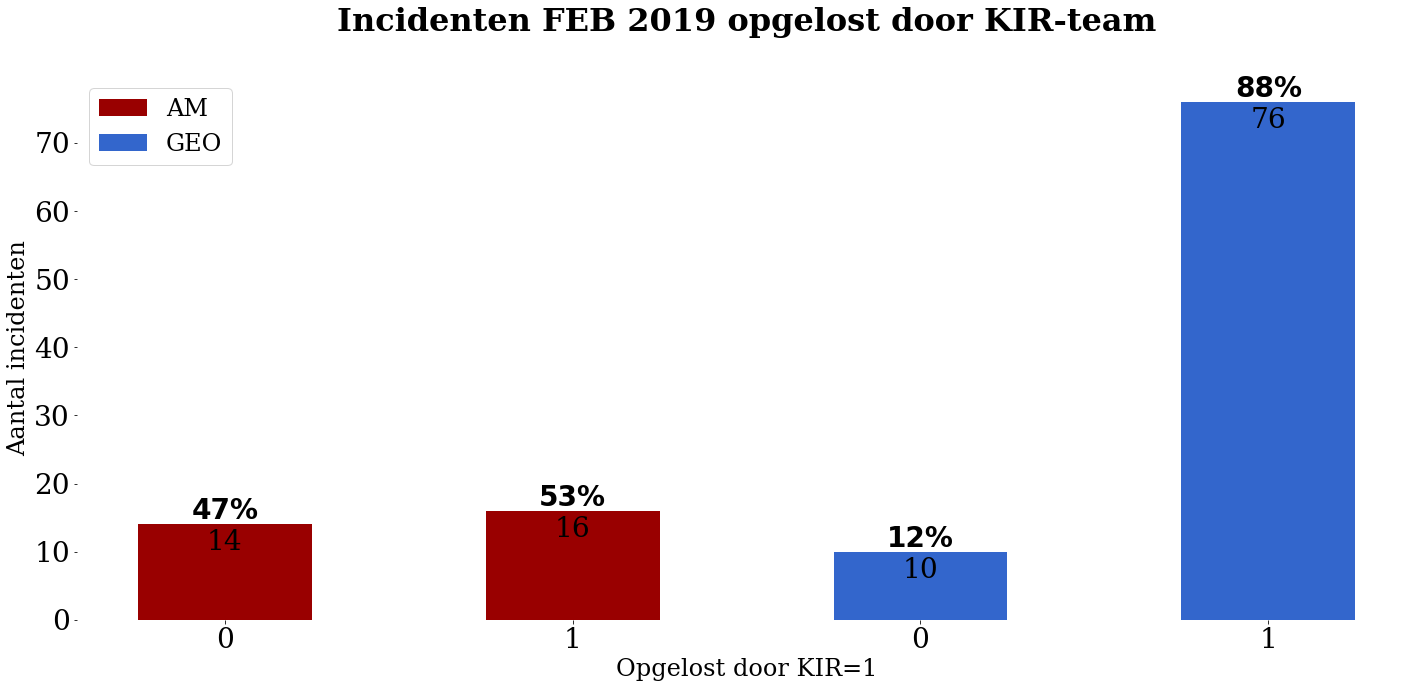

In [20]:
incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
incidenten_ean_GeoAM = incidenten_ean.groupby(by=["Resolution Group Name", "KIR"]).count()["Incident ID"]

# Bereken verhouding incidenten opgelost door KIR per team
proportie = []
for i, amount in incidenten_ean_GeoAM.items():
    if i[0] == "AM":
        som = sum(incidenten_ean_GeoAM["AM"])   
    else:
        som = sum(incidenten_ean_GeoAM["GEO"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(4) + 1
bar = ax.bar(bar_positions, incidenten_ean_GeoAM.values, width=0.5, color=barcolors)
tick_positions = range(1,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incidenten_ean_GeoAM.index.get_level_values(1))
ax.set_xlabel("Opgelost door KIR=1", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten "+periode+" opgelost door KIR-team", fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(incidenten_ean_GeoAM):
    ax.text(i+1, v+(0.01*max(incidenten_ean_GeoAM.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
for i, v in enumerate(incidenten_ean_GeoAM): # Label aantal incidenten 
        ax.text(i+1, incidenten_ean_GeoAM[i]+(-0.05*max(incidenten_ean_GeoAM.values)), 
                str(v), horizontalalignment='center', color='black', fontsize=28)
ax.set_frame_on(b=False)
ax.legend(bar[1:3], ["AM", "GEO"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsOpgelostDoorKIR_"+today+".png")
plt.show()


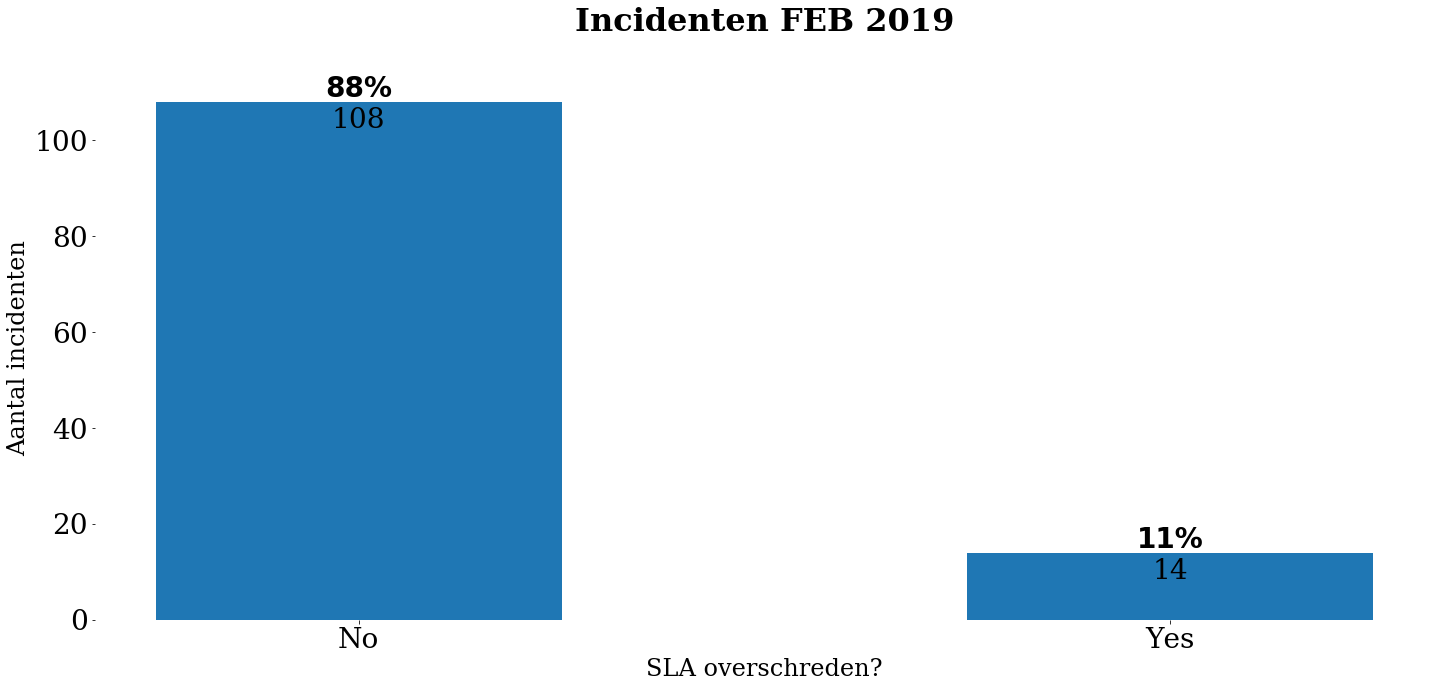

In [21]:
breached_incidenten = incidenten.groupby(by=["Is Breached"]).count()["Incident ID"]
barplot(breached_incidenten, 0.5, "SLA overschreden?", "Aantal incidenten", "incidentsBreached", "Incidenten "+periode)

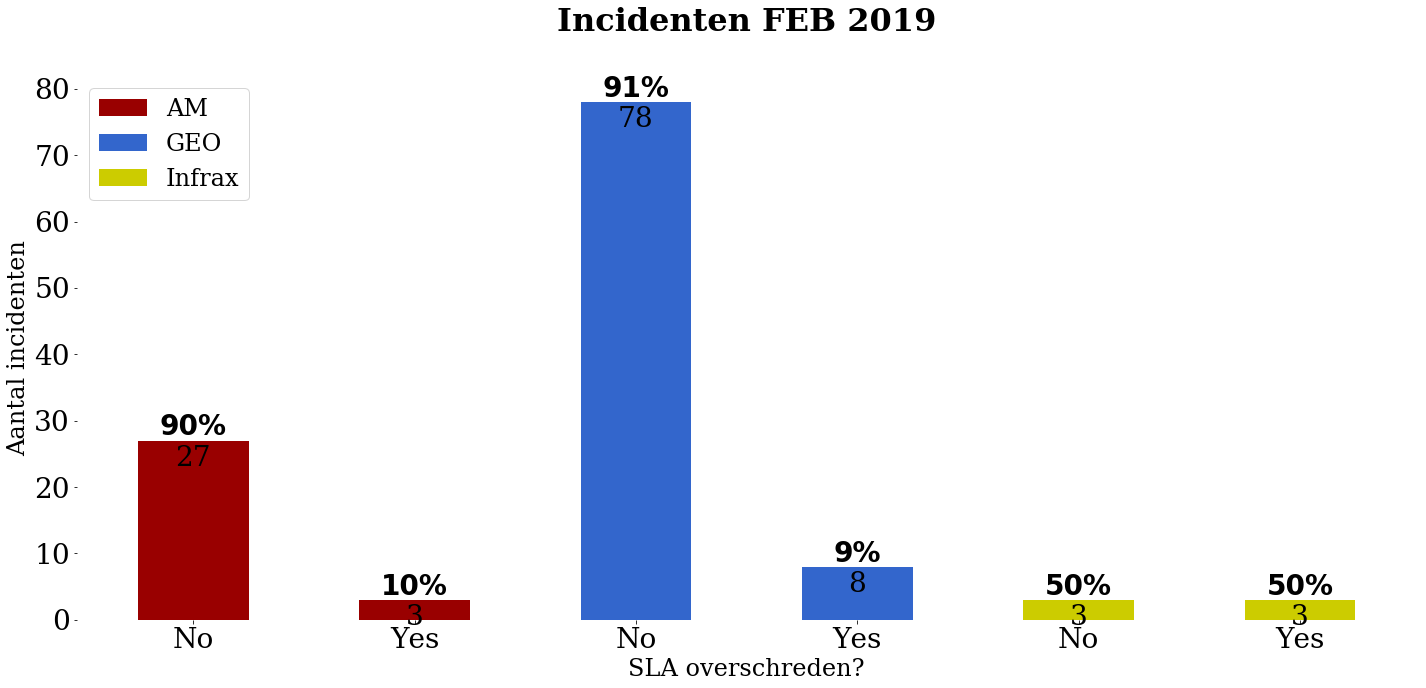

In [22]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
grouped_incidenten = incidenten.groupby(by=["Resolution Group Name", "Is Breached"]).count()["Incident ID"]

# Bereken verhouding breached incidenten per team
proportie = []
for i, amount in grouped_incidenten.items():
    if i[0] == "AM":
        som = sum(grouped_incidenten["AM"])   
    elif i[0] == "GEO":
        som = sum(grouped_incidenten["GEO"])
    else:
        som = sum(grouped_incidenten["I"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc", "#cccc00", "#cccc00"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(6) + 1
bar = ax.bar(bar_positions, grouped_incidenten.values, width=0.5, color=barcolors)
tick_positions = range(1,7)
ax.set_xticks(tick_positions)
ax.set_xticklabels(grouped_incidenten.index.get_level_values(1))
ax.set_xlabel("SLA overschreden?", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten "+periode, fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(grouped_incidenten):
    ax.text(i+1, v+(0.01*max(grouped_incidenten.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
for i, v in enumerate(grouped_incidenten): # Label aantal incidenten 
        ax.text(i+1, grouped_incidenten[i]+(-0.05*max(incidenten_ean_GeoAM.values)), 
                str(v), horizontalalignment='center', color='black', fontsize=28)
ax.set_frame_on(b=False)
ax.legend(bar[::2], ["AM", "GEO", "Infrax"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsBreachedPerTeam"+today+".png")
plt.show()


In [23]:
"""
incident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]
proportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]

barcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]

fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(9) + 1
ax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)
tick_positions = range(1,10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incident_by_team_complex.index)
ax.set_xlabel("('Team', 'Complexiteit')", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
for i, v in enumerate(incident_by_team_complex):
    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
plt.savefig("incident_by_team_complex.png")
plt.show()
"""

'\nincident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]\nproportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]\n\nbarcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]\n\nfig = plt.figure(figsize=(24, 10))\nax = fig.add_subplot(1,1,1)\nbar_positions = arange(9) + 1\nax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)\ntick_positions = range(1,10)\nax.set_xticks(tick_positions)\nax.set_xticklabels(incident_by_team_complex.index)\nax.set_xlabel("(\'Team\', \'Complexiteit\')", fontsize=24)\nax.set_ylabel("Aantal incidenten", fontsize=24)\nax.tick_params(labelsize=28)\nfor i, v in enumerate(incident_by_team_complex):\n    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment=\'center\', color=\'black\', fontdict=textfont)\nax.set_frame_on(b=False)\nplt.savefig("incident_by_tea

In [24]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
971,398971,Email,No,Priority 4,Nemesis Middenspanning geeft foutmelding op Op...,PBACC170.DLL aan de sources toegevoegd: \n\\mo...,EAN1366 Nemesis Middenspanning andere incidenten,HFG454 - Ceri-Anne Barra,2019-02-07 09:50:33,2019-02-07 10:52:17,Closed,AM,AM,0
975,399034,Self Service,Yes,Priority 3,BVDMF820 (GasLekDetectie job) in error,Probleem met folder-permissies op Oracle. Opge...,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2019-02-07 11:11:39,2019-02-21 14:47:14,Closed,AM,AM,0
984,400030,Self Service,No,Priority 3,MF167 (CreateGasLeak) - bericht in error,Te wijten aan technisch probleem sinds fusie g...,EAN0834 EAI melding Operaties & Monitoring,BJG074 - Steven De Loose,2019-02-11 15:46:10,2019-02-12 08:54:18,Closed,AM,AM,0
989,400320,Email,No,Priority 4,RE: Lichtmast niet actief,Lichtmast op actief gezet,EAN3507 OV WEB andere incidenten,FFB170 - Patrick Krikilion,2019-02-12 13:55:03,2019-02-13 09:46:47,Closed,AM,AM,0
1006,402492,Phone,Yes,Priority 3,Begin/eind datum wordt niet weergegeven,Bugfix in deployment via Koen Willocx,EAN2302 GON andere incidenten,HCF171 - Tom Samyn,2019-02-18 10:42:21,2019-02-21 13:32:52,Closed,AM,AM,0
1015,402915,Self Service,No,Priority 4,Bijlagen openen niet,Probleem met folder-permissies op Oracle. Opge...,EAN4410 SAP univlam mobile bijlagen orders ope...,IEH144 - Sabrine De Meerleer,2019-02-19 11:45:14,2019-02-21 14:47:14,Closed,AM,AM,0
1024,403378,Phone,No,Priority 3,Begin en einddatum in GON vullen zich niet lan...,Bugfix in deployment via Koen Willocx,EAN2302 GON andere incidenten,HCF171 - Tom Samyn,2019-02-20 14:11:59,2019-02-21 13:32:15,Closed,AM,AM,0
1031,403855,Phone,No,Priority 4,PROBLEEM MET PREVENTIEF ORDER 302468506 IN OV WEB,De footboodschap komt doordat de steun+ een st...,EAN3507 OV WEB andere incidenten,CCI021 - Patrick Dierick,2019-02-22 09:46:53,2019-02-22 15:07:19,Closed,AM,AM,0
1032,403941,Phone,No,Priority 4,Dossier - deelnetwerk kan niet geopend worden,UPDATE NOVSTUURPUNT\nSET LOGWEG = 0\nWHERE ID ...,EAN4152 OV WEB Deelnetwerk (DNW) incidenten,BFJ469 - Björn Van Damme,2019-02-22 13:05:15,2019-02-22 14:18:11,Closed,AM,AM,0
1043,404667,Phone,No,Priority 4,VB script om AD gebruikers op te laden niet ge...,Scripts zijn opgeladen op P-omgeving door Alai...,EAN1890 Visavla andere incidenten,DGA596 - Dominique Bostyn,2019-02-26 15:39:15,2019-02-27 16:27:23,Closed,AM,AM,0


In [25]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
975,399034,Self Service,Yes,Priority 3,BVDMF820 (GasLekDetectie job) in error,Probleem met folder-permissies op Oracle. Opge...,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2019-02-07 11:11:39,2019-02-21 14:47:14,Closed,AM,AM,0
1006,402492,Phone,Yes,Priority 3,Begin/eind datum wordt niet weergegeven,Bugfix in deployment via Koen Willocx,EAN2302 GON andere incidenten,HCF171 - Tom Samyn,2019-02-18 10:42:21,2019-02-21 13:32:52,Closed,AM,AM,0
1707,402375,Phone,Yes,Priority 4,Encore server down,restore data heeft probleem verholpen,EAN3917 Encore,EEL052 - Steven Opsommer,2019-02-18 08:36:52,2019-02-28 10:44:53,Closed,AM,HIE161 - Tim De Bondt,0


In [112]:
incidenten[(incidenten["Resolution Group Name"]=="GEO") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
977,399201,Email,No,Priority 4,GIPOD problemen,"Shelley,\nDaar het hnw een eindtijdstip had di...",EAN2870 GIPOD andere incidenten,BCH442 - Shelley Stroobants,2019-02-07 15:12:59,2019-02-11 10:32:55,Closed,GEO,GEO,0
982,399781,Email,Yes,Priority 3,Desync tussen LARA en GEO (dossier 46068057),Patch doorgevoerd voor dit specifieke probleem...,EAN1113 SAP UniVlam andere incidenten,GFH006 - Claudia Saerens,2019-02-11 09:17:00,2019-02-13 11:35:53,Closed,GEO,GEO,0
990,400434,Email,No,Priority 3,Niet mogelijk om groene meterstanden in te gev...,Dilsen 3650 ontbrak in de de DNB-structuur waa...,EAN4181 Website Eandis - Uniek Loket GMS - and...,IDH447 - Thierry Demeire,2019-02-12 19:40:16,2019-02-13 19:09:37,Closed,GEO,GAH048 - Gert Van Dyck,0
1033,403942,Phone,Yes,Priority 4,Meldingen defecte straatlampen werkt niet - me...,Update straten : koppelen aan juiste DNB op ba...,EAN1631 Website Eandis - Straatlampen andere i...,BJF353 - Kristof De Baerdemaeker,2019-02-22 13:13:40,2019-03-07 14:07:58,Closed,GEO,GAH048 - Gert Van Dyck,0
1035,404008,Self Service,No,Priority 4,GEO - Fout in export GEO extracts,DB-only,EAN2258 GeoView GeoLis andere incidenten,KPK473 - Inge Roekens,2019-02-22 16:37:51,2019-02-26 09:44:20,Closed,GEO,PPC524 - Katrien Verbeek,0
1040,404243,Email,Yes,Priority 4,Melding defecte straatlampen Antwerpen - DRINGEND,"Op basis van een lijst, aangeleverd door BPA w...",EAN3549 Website Eandis - Straatlampenstatussen...,DAF233 - Erwin Boogaerts,2019-02-25 11:52:39,2019-03-07 14:08:57,Closed,GEO,GAH048 - Gert Van Dyck,0
1052,405058,Email,No,Priority 4,HUISNR GEKEND IN LARA--> BIJ HET MAKEN VAN SAO...,Volgende controles warden uitgevoerd : \nSAPST...,EAN1268 GeoCompass andere incidenten,ACC497 - Inge Van de Velde,2019-02-28 08:28:24,2019-03-04 15:01:00,Closed,GEO,GAH048 - Gert Van Dyck,0
1053,405085,Phone,No,Priority 4,Geen tegels meer zichtbaar.,Rechten kwamen in conflict met 'G.Remote Porta...,EAN3989 AVI Geoviewer Applicatie niet zichtbaa...,HQD518 - Rolf Schramme,2019-02-28 09:32:52,2019-03-01 13:10:05,Closed,GEO,GEO,0
1055,405138,Phone,No,Priority 4,tegels niet zichtbaar in AVI Geoviewer,Rechten kwamen in conflict met 'G.Remote Porta...,EAN3989 AVI Geoviewer Applicatie niet zichtbaa...,ADD787 - Bart Van Gorp,2019-02-28 11:15:22,2019-03-01 13:10:23,Closed,GEO,GEO,0
1708,404285,Phone,Yes,Priority 2 - BH,Melding naar callcenter komt iet in functionel...,bij verzenden mail voor onderbrekingen gemeent...,EAN2302 GON andere incidenten,GAH128 - Jo Gyselinck,2019-02-25 13:54:10,2019-02-27 11:30:07,Closed,GEO,HIE161 - Tim De Bondt,0


In [27]:
incidenten[(incidenten["Resolution Group Name"]=="GEO") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
946,397629,Email,Yes,Priority 4,FW: ticket 393679 FW: Defect: ME_406,- GIS CC: foutmelding kwam niet meer voor bij ...,EAN2019 Opleiding PC (ITOP) - software incidenten,FEH019 - Rudolf De Belder,2019-02-01 12:52:43,2019-02-11 17:29:39,Closed,GEO,QTP864 - Ken Bergers,1
982,399781,Email,Yes,Priority 3,Desync tussen LARA en GEO (dossier 46068057),Patch doorgevoerd voor dit specifieke probleem...,EAN1113 SAP UniVlam andere incidenten,GFH006 - Claudia Saerens,2019-02-11 09:17:00,2019-02-13 11:35:53,Closed,GEO,GEO,0
994,400829,Email,Yes,Priority 4,Algemene ISU vraag,Het adres Paalstraat 36 is manueel aangemaakt ...,EAN3182 Agiv Lara andere incidenten,FCI042 - Beatrys Goossens,2019-02-14 10:40:28,2019-03-07 14:44:13,Closed,GEO,QTP864 - Ken Bergers,1
1018,403136,Phone,Yes,Priority 3,ulysse 2 lpf niet te openen in ulysse 3,Ulysse 2 geïnstalleerd,EAN2480 Ulysse andere incidenten,FCD068 - Luc Van Acker,2019-02-20 06:52:49,2019-02-26 08:49:40,Closed,GEO,QTP864 - Ken Bergers,1
1033,403942,Phone,Yes,Priority 4,Meldingen defecte straatlampen werkt niet - me...,Update straten : koppelen aan juiste DNB op ba...,EAN1631 Website Eandis - Straatlampen andere i...,BJF353 - Kristof De Baerdemaeker,2019-02-22 13:13:40,2019-03-07 14:07:58,Closed,GEO,GAH048 - Gert Van Dyck,0
1040,404243,Email,Yes,Priority 4,Melding defecte straatlampen Antwerpen - DRINGEND,"Op basis van een lijst, aangeleverd door BPA w...",EAN3549 Website Eandis - Straatlampenstatussen...,DAF233 - Erwin Boogaerts,2019-02-25 11:52:39,2019-03-07 14:08:57,Closed,GEO,GAH048 - Gert Van Dyck,0
1059,405341,Email,Yes,Priority 3,Postcode checker op website Fluvius stuurt doo...,Seqstreet 3278 was gekoppeld met DNB's IVEG (e...,EAN3555 Website Eandis andere incidenten,IDH447 - Thierry Demeire,2019-02-28 19:35:32,2019-03-07 10:25:26,Closed,GEO,QTP864 - Ken Bergers,1
1708,404285,Phone,Yes,Priority 2 - BH,Melding naar callcenter komt iet in functionel...,bij verzenden mail voor onderbrekingen gemeent...,EAN2302 GON andere incidenten,GAH128 - Jo Gyselinck,2019-02-25 13:54:10,2019-02-27 11:30:07,Closed,GEO,HIE161 - Tim De Bondt,0


In [107]:
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten_full = incidenten_geo.append(incidenten_am2, ignore_index=True)
incidenten_full.dropna(inplace=True, how='all')

labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten_full = incidenten_full.drop(labels, axis=1)
incidenten_full.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,334734,Phone,Yes,Priority 4,Elont crasht en heeft foutmeldingen bij het te...,niet te simuleren,EAN1233 Elont andere incidenten,IIL141 - Eline de Beauffort,2018-02-05 10:35:08,2018-03-14 09:07:08,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
2,335216,Phone,Yes,Priority 4,Geolis: Selectie in plan laden duurt heel lang...,performantie,EAN2258 GeoView GeoLis andere incidenten,EFC047 - Paul Michiels,2018-02-08 09:22:41,2018-03-22 15:34:09,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
3,337695,Phone,No,Priority 0,Geoview 12 maand niet gebruikt,user werd unlocked,EAN2662 Gis ControleCentrum niet gebruikt sind...,BGA026 - Bart Arbyn,2018-02-27 12:52:47,2018-02-27 14:24:18,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
4,337722,Phone,No,Priority 0,12 maanden locked - Geoview,gebruiker unlock uitgevoerd,EAN2662 Gis ControleCentrum niet gebruikt sind...,EAF231 - Sam Braeckman-D'Hondt,2018-02-27 14:47:26,2018-03-01 11:10:06,Closed,Appl Netten GEO,JAD401 - Nick Ceulemans


In [108]:
incidenten_cut = incidenten_full[(incidenten_full["Date Created"] > '2018-09-01') & (incidenten_full["Date Created"] < '2019-03-01')]
incidentenByArticle = incidenten_cut.groupby(by=["Article"]).count()["Incident ID"]
incidentenByArticle = incidentenByArticle[incidentenByArticle>=5] # Waarvoor meer dan 5 incidenten

In [109]:
df_incidentenByArticle = pd.DataFrame(incidentenByArticle)
df_incidentenByArticle.rename(columns={'Incident ID': "Count"}, inplace=True) 
df_incidentenByArticle

,Count
Article,
EAN0617 OCE Plotter technische incidenten,18
EAN0834 EAI melding Operaties & Monitoring,80
EAN1113 SAP UniVlam andere incidenten,17
EAN1158 UNITTG - TTG andere incidenten 1 gebruiker,6
EAN1169 GeoView GeoLis Autoplan,8
EAN1233 Elont andere incidenten,22
EAN1334 GeoView functionele vragen,5
EAN1357 Nemesis Gas andere incidenten,6
EAN1366 Nemesis Middenspanning andere incidenten,35


In [111]:
df_incidentenByArticle["Ratio"] = df_incidentenByArticle["Count"]/df_incidentenByArticle["Count"].sum()*100
df_incidentenByArticle["Ratio"] = df_incidentenByArticle["Ratio"].apply(lambda x: round(x, 1))
df_incidentenByArticle

,Count,Ratio
Article,,
EAN0617 OCE Plotter technische incidenten,18,2.8
EAN0834 EAI melding Operaties & Monitoring,80,12.3
EAN1113 SAP UniVlam andere incidenten,17,2.6
EAN1158 UNITTG - TTG andere incidenten 1 gebruiker,6,0.9
EAN1169 GeoView GeoLis Autoplan,8,1.2
EAN1233 Elont andere incidenten,22,3.4
EAN1334 GeoView functionele vragen,5,0.8
EAN1357 Nemesis Gas andere incidenten,6,0.9
EAN1366 Nemesis Middenspanning andere incidenten,35,5.4


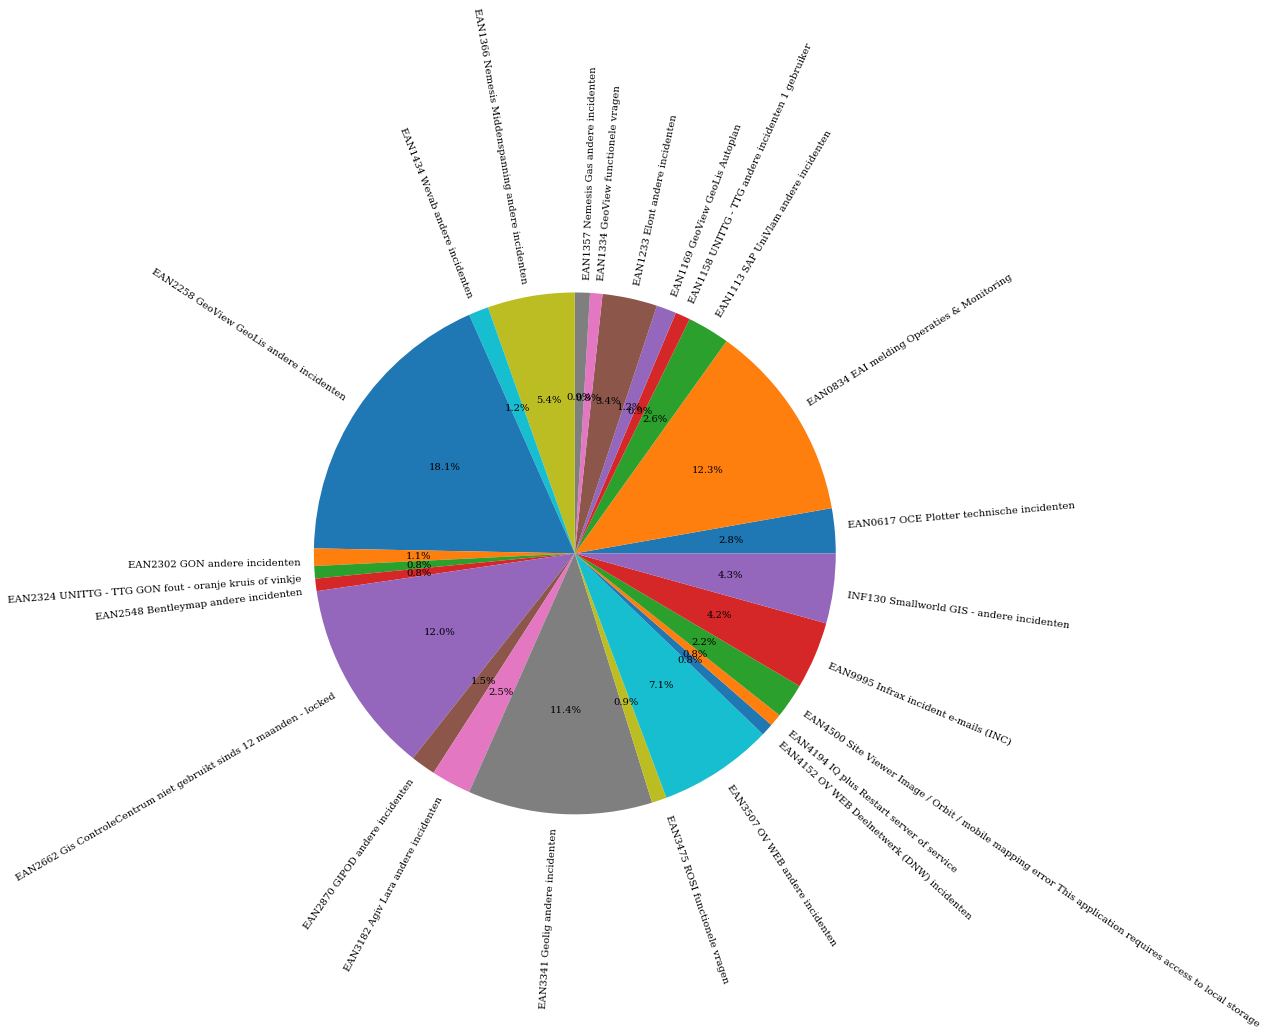

In [106]:
plt.pie(df_incidentenByArticle["Count"], labels=df_incidentenByArticle.index, autopct='%.1f%%', labeldistance=1.05, radius=3,
       rotatelabels=True)
plt.show()